13.04057409507197 124.02010050251256


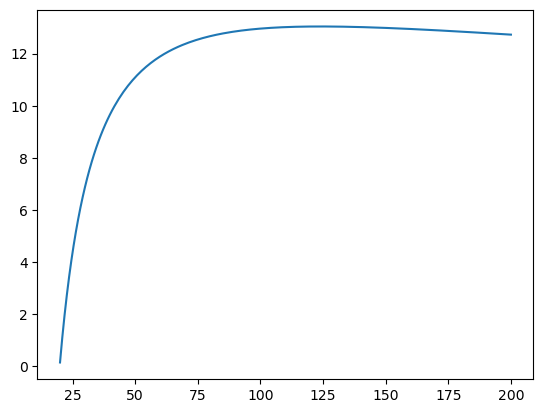

In [63]:
import numpy as np
from scipy.integrate import trapezoid
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

data = np.loadtxt('../Potentials/He-Beck1968_modified.table', skiprows=8)

def Beck1968(r):

    A = 398.7
    a = 0.675
    alpha = 4.390
    beta = 3.746e-4

    return  A*np.exp(-alpha*r - beta*r**6) - (0.869/((r**2 + a**2)**3)) * (1 + ((2.709 + 3*a**2)/(r**2 + a**2)))

def virial_2(r, phi, T):

    kb = 8.6173303e-5
    beta = 1 / (kb * T)
    y = ( 1 - np.exp(-beta * phi) ) * r**2

    return 2* np.pi* (trapezoid(y, r) + r[0]**3/3)

# phi = data[:,2]
r = data[:,1]

phi = Beck1968(r)

pot = interp1d(data[:, 1], data[:, 2])

N = 200

kb = 8.6173303e-5

T_arr = np.linspace(20, 200, N)

B2 = np.zeros(T_arr.shape)

for i, T in enumerate(T_arr):

    B2[i] = virial_2(r, phi, T)

conv = 6.02214e-1

B2 = B2*conv
plt.plot(T_arr, B2)

print(B2.max(), T_arr[B2.argmax()])

2.96687325599977 -0.0008962277245941352


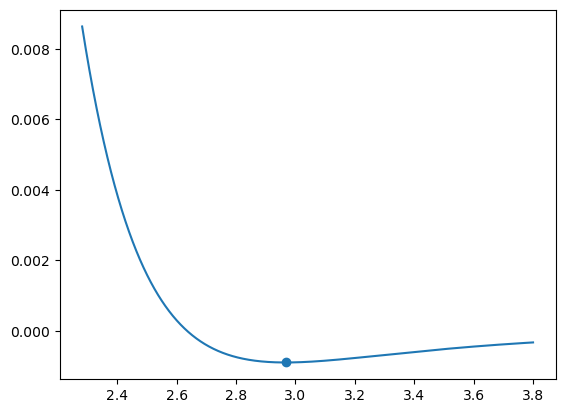

In [59]:
minima = phi.argmin()
print(r[minima], phi[minima])

k = 3000

plt.plot(r[k:], phi[k:])

plt.scatter(r[minima], phi[minima])

In [73]:

print(virial_2(r, phi, 1000
               ))

15.682504085791297
